# Exploratory Data Analysis - Retail 



## Spark Foundation Task Specifications

- Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
- As a business manager, try to find out the weak areas where you can work to make more profit.
- What all business problems you can derive by exploring the data?

### Importing Libraries and Data

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

### Assessing, Exploring, & Understanding the Data

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


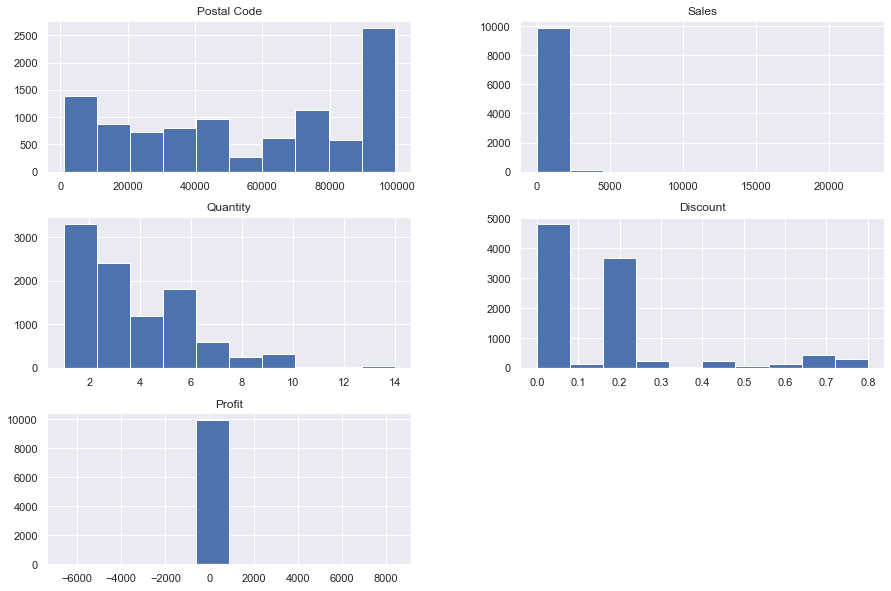

In [4]:
df.hist(figsize=(15,10));

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
df.shape

(9994, 13)

In [9]:
df.duplicated().sum()

17

In [10]:
df[df.duplicated()==True]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


**After exploring the data their are no duplicates**

#### Exploring unique values in the dataframe

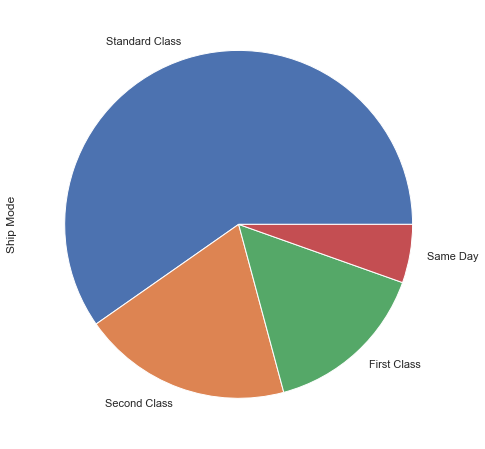

In [11]:
df['Ship Mode'].value_counts().plot(kind='pie', figsize=(8,8));

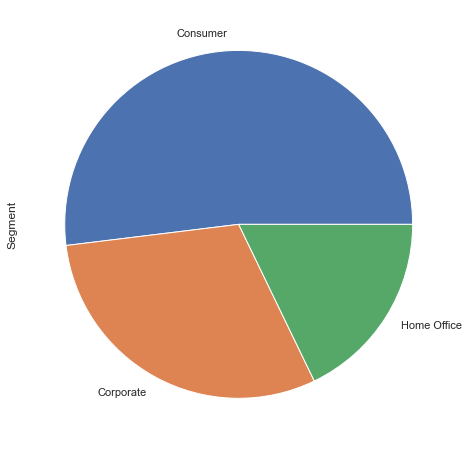

In [12]:
df['Segment'].value_counts().plot(kind='pie', figsize=(8,8));

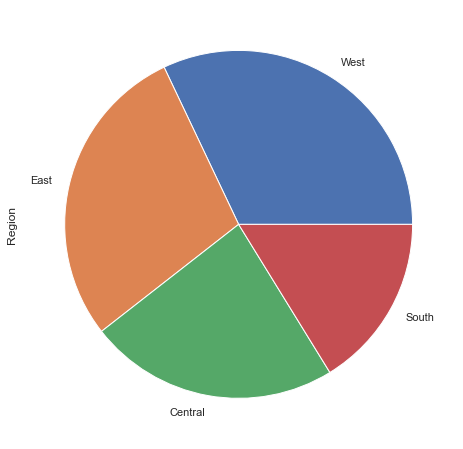

In [13]:
df['Region'].value_counts().plot(kind='pie', figsize=(8,8));

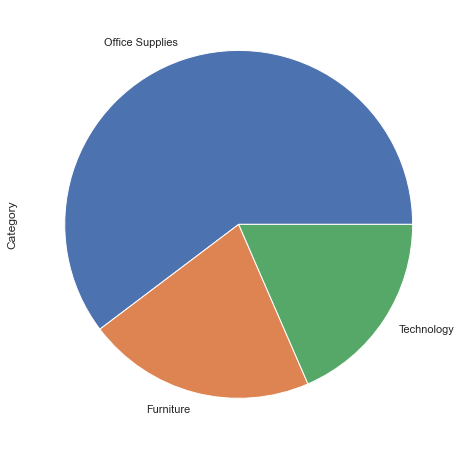

In [14]:
df['Category'].value_counts().plot(kind='pie', figsize=(8,8));

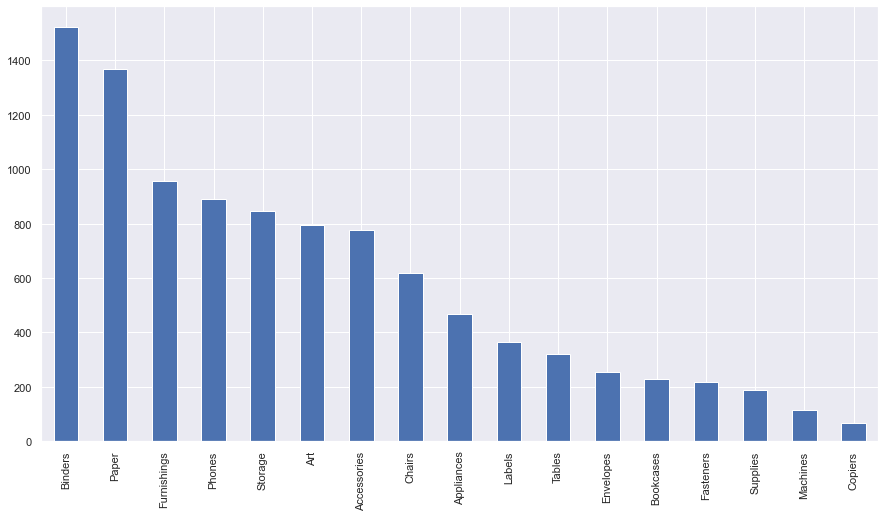

In [15]:
df['Sub-Category'].value_counts().plot(kind='bar', figsize=(15,8));

____________________

### Analysis & Visualizations

**The analysis is structured as partitions, each part will focus on one independent variable with one or more dependent variables, and discuss their relation and how the first one affect the other.**

**The structure as followes:**
1. Segment Analysis
2. Category & Sub-Category Analysis
3. Ship Mode Analysis
4. Quantity & Discount Analysis
5. Location Analysis

#### Setting up some Visualizations Characterstics

In [16]:
font_size1 = 18
font_size2 = 14

In [17]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


1. Segment VS Sales & Quantity
2. Segment VS City & Country
3. Segment VS Category
4. Sales VS Category & Sub_Category
5. Sales VS City & Country
6. Sales VS Quantity
7. Sales VS Profit & Discount
8. Sales VS Ship Mode
9. City VS Category & Sub_Category
10. Profit VS Category & Sub_Category
11. Profit VS City & Country
12. Profit VS Quantity
13. Profit VS Sales & Discount
14. Profit VS Ship Mode
15. Discount VS Quantity
16. Discount VS Ship Mode
17. Discount VS Category
18. Discount VS City
19. Discount VS Segment
20. City and State VS Sales, Quantity and Profit (Map)

In [ ]:
sb.regplot(data = df, x ='Sales', y ='Profit', x_jitter = 0.04, scatter_kws = {'alpha':3/10}, fit_reg = False);

In [ ]:
bins = np.arange(-5,600,10)
plt.hist(data = df, x='Sales', bins=bins);

In [ ]:
bins = np.arange(-100,150,5)
plt.hist(data = df, x='Profit', bins=bins);

### Segment Analysis 

#### Segments Types

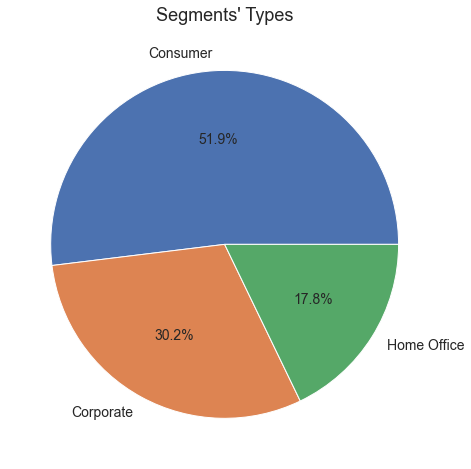

In [18]:
df['Segment'].value_counts().plot(kind='pie', figsize=(8,8),autopct='%1.1f%%', fontsize=font_size2);
plt.title("Segments' Types", fontsize=font_size1)
plt.ylabel('');

As the graph clearly views the diffirent types of segments and the percentage of each one.
Consumer is the highest segment, 51.9% of the company customers are consumers and it shows that the company depend on this segment as the main source of profit.

#### Order of Segments based on Sales

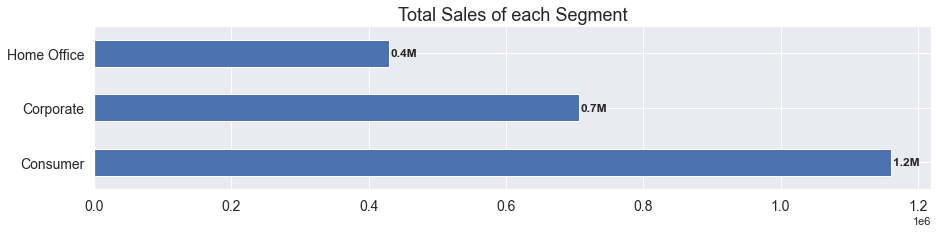

In [35]:
df.groupby('Segment')['Sales'].sum().nlargest().plot(kind='barh', figsize=(15,3), fontsize=font_size2);
plt.title('Total Sales of each Segment', fontsize=font_size1)
plt.ylabel('');

for num, value in enumerate(df.groupby('Segment')['Sales'].sum().nlargest()):
    plt.text(value+2000, num, str(np.round(value/1000000, decimals = 1))+'M', fontweight='bold', va = 'center');

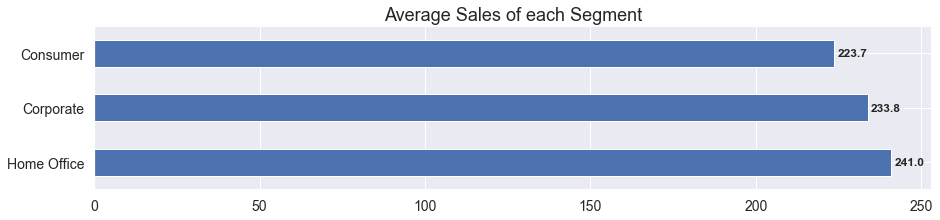

In [36]:
df.groupby('Segment')['Sales'].mean().nlargest().plot(kind='barh', figsize=(15,3), fontsize=font_size2);
plt.title('Average Sales of each Segment', fontsize=font_size1)
plt.ylabel('');

for num, value in enumerate(df.groupby('Segment')['Sales'].mean().nlargest()):
    plt.text(value+1, num, str(np.round(value, decimals = 1)), fontweight='bold', va = 'center');

Here we can get that the segment that has the highest **sales** rate is **Home Office Segment** even when it forms only 17.8% of the all segments and its total **sales** is less than half a million.

#### Order of Segments based on Profit

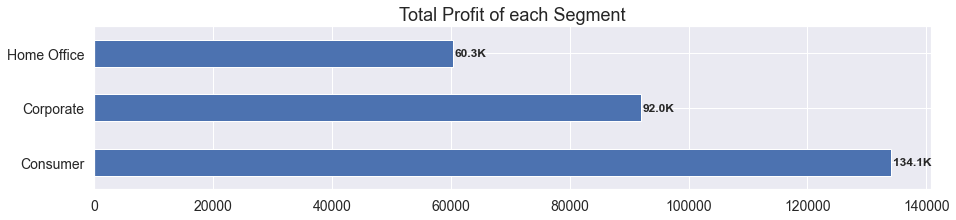

In [47]:
df.groupby('Segment')['Profit'].sum().nlargest().plot(kind='barh', figsize=(15,3), fontsize=font_size2);
plt.title('Total Profit of each Segment', fontsize=font_size1)
plt.ylabel('');

for num, value in enumerate(df.groupby('Segment')['Profit'].sum().nlargest()):
    plt.text(value+300, num, str(np.round(value/1000, decimals = 1))+'K', fontweight='bold', va = 'center');

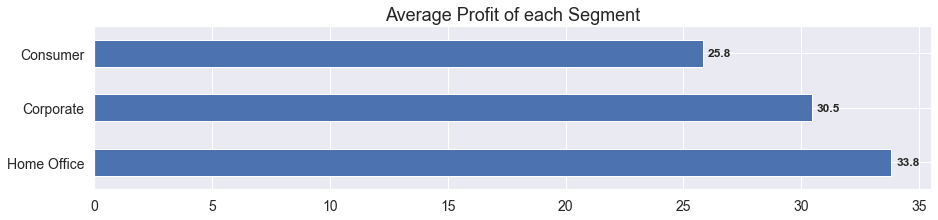

In [48]:
df.groupby('Segment')['Profit'].mean().nlargest().plot(kind='barh', figsize=(15,3), fontsize=font_size2);
plt.title('Average Profit of each Segment', fontsize=font_size1)
plt.ylabel('');

for num, value in enumerate(df.groupby('Segment')['Profit'].mean().nlargest()):
    plt.text(value+0.2, num, str(np.round(value, decimals = 1)), fontweight='bold', va = 'center');

Here we can get that the segment that has the highest **profit** rate is **Home Office Segment** even when it forms only 17.8% of the all segments and its total **profit** is less than 100K.

#### Segments under Profit & Sales

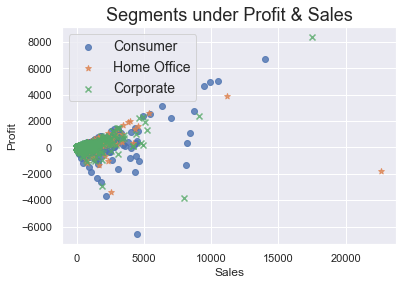

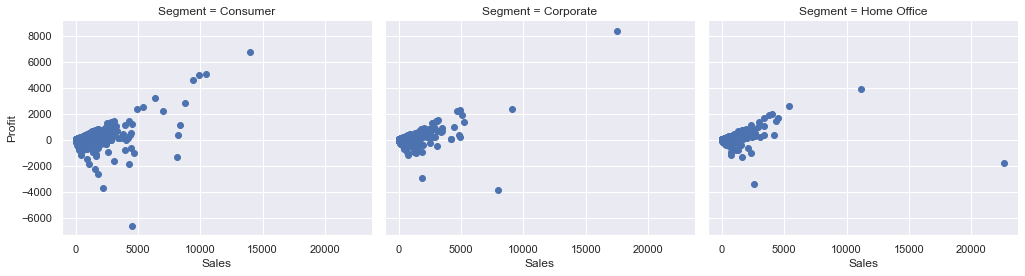

In [146]:
Segments_Markers = [['Consumer','o'], ['Home Office','*'], ['Corporate','x']]

for Segment, Marker in Segments_Markers:
    plotdata = df[df['Segment']==Segment]
    sb.regplot(data = plotdata, x ='Sales', y ='Profit', x_jitter = 0.04, scatter_kws = {'alpha':8/10}, fit_reg = False, marker=Marker)
plt.legend(['Consumer', 'Home Office','Corporate'], fontsize=font_size2);
plt.title('Segments under Profit & Sales', fontsize=font_size1)

graph = sb.FacetGrid(data = df, col='Segment', size = 4, aspect =1.2, col_wrap = 3);
graph.map(plt.scatter,'Sales','Profit');

Here we can get a summary of how the segments variate according to **sales and profit** and can notice the range of each segment and the common area of sales an profit.

========================================================================================================================

#### Quantity of each Segment

Segment
Consumer       19521
Corporate      11608
Home Office     6744
Name: Quantity, dtype: int64

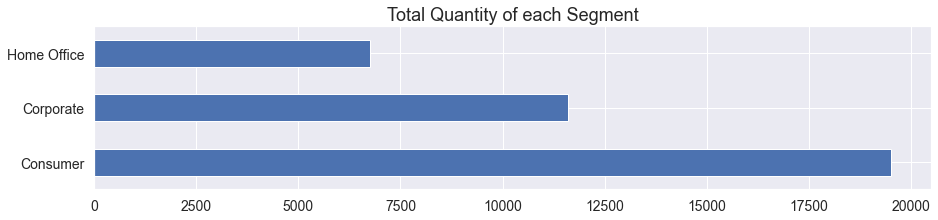

In [49]:
df.groupby('Segment')['Quantity'].sum().plot(kind='barh', figsize=(15,3), fontsize=font_size2);
plt.title('Total Quantity of each Segment', fontsize=font_size1)
plt.ylabel('');
df.groupby('Segment')['Quantity'].sum()

#### Highest 10 Segments in All Cities

City           Segment  
New York City  Consumer     504
Los Angeles    Consumer     382
Philadelphia   Consumer     269
New York City  Corporate    266
San Francisco  Consumer     260
Los Angeles    Corporate    237
Seattle        Consumer     219
Houston        Consumer     212
Philadelphia   Corporate    177
Chicago        Consumer     174
Name: Segment, dtype: int64

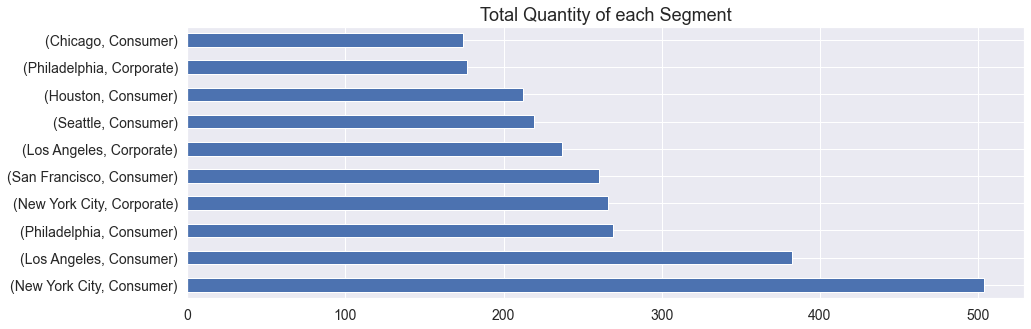

In [50]:
df.groupby('City')['Segment'].value_counts().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Total Quantity of each Segment', fontsize=font_size1)
plt.ylabel('');
df.groupby('City')['Segment'].value_counts().nlargest(10)

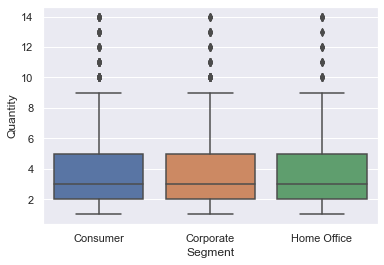

In [52]:
sb.boxplot(data = df, x ='Segment', y ='Quantity');

#### Category & Sub-Category Analysis

1. Segment VS Sales & Quantity
2. Segment VS City & Country
3. Segment VS Category
4. Sales VS Category & Sub_Category
5. Sales VS City & Country
6. Sales VS Quantity
7. Sales VS Profit & Discount
8. Sales VS Ship Mode
9. City VS Category & Sub_Category
10. Profit VS Category & Sub_Category
11. Profit VS City & Country
12. Profit VS Quantity
13. Profit VS Sales & Discount
14. Profit VS Ship Mode
15. Discount VS Quantity
16. Discount VS Ship Mode
17. Discount VS Category
18. Discount VS City
19. Discount VS Segment
20. City and State VS Sales, Quantity and Profit (Map)

### Cities Analysis

#### Top 10 Categories by City

City           Category       
New York City  Office Supplies    552
Los Angeles    Office Supplies    443
San Francisco  Office Supplies    322
Philadelphia   Office Supplies    312
Seattle        Office Supplies    249
Houston        Office Supplies    231
New York City  Furniture          192
Chicago        Office Supplies    187
New York City  Technology         171
Los Angeles    Furniture          154
Name: Category, dtype: int64

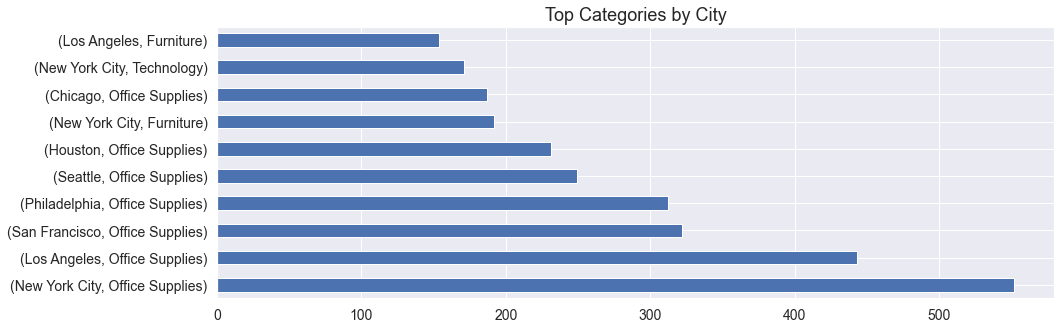

In [53]:
df.groupby('City')['Category'].value_counts().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Top Categories by City', fontsize=font_size1)
plt.ylabel('');
df.groupby('City')['Category'].value_counts().nlargest(10)

#### Order of Segments by Category

Category         Segment    
Office Supplies  Consumer       3127
                 Corporate      1820
Furniture        Consumer       1113
Office Supplies  Home Office    1079
Technology       Consumer        951
Furniture        Corporate       646
Technology       Corporate       554
Furniture        Home Office     362
Technology       Home Office     342
Name: Segment, dtype: int64

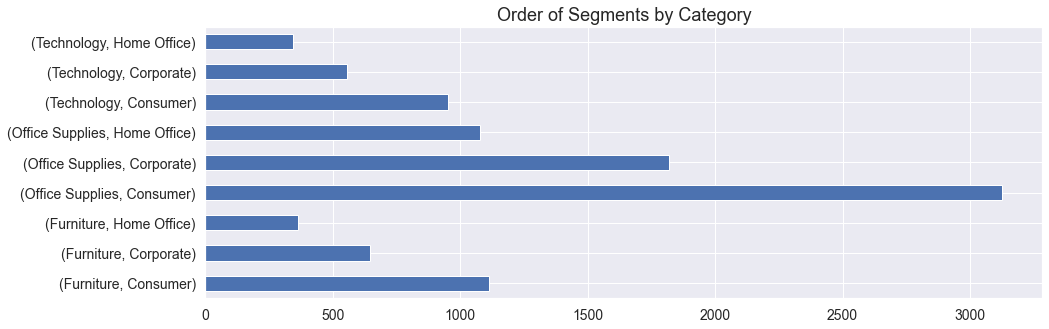

In [51]:
df.groupby('Category')['Segment'].value_counts().plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Order of Segments by Category', fontsize=font_size1)
plt.ylabel('');
df.groupby('Category')['Segment'].value_counts().nlargest(10)

#### Top 10 Sub-categories by City

City           Category         Sub-Category
New York City  Office Supplies  Binders         145
                                Paper           124
Los Angeles    Office Supplies  Paper           118
                                Binders          98
New York City  Technology       Phones           89
Philadelphia   Office Supplies  Binders          87
New York City  Office Supplies  Storage          82
               Furniture        Furnishings      78
Seattle        Office Supplies  Binders          75
Los Angeles    Technology       Phones           74
Name: Sub-Category, dtype: int64

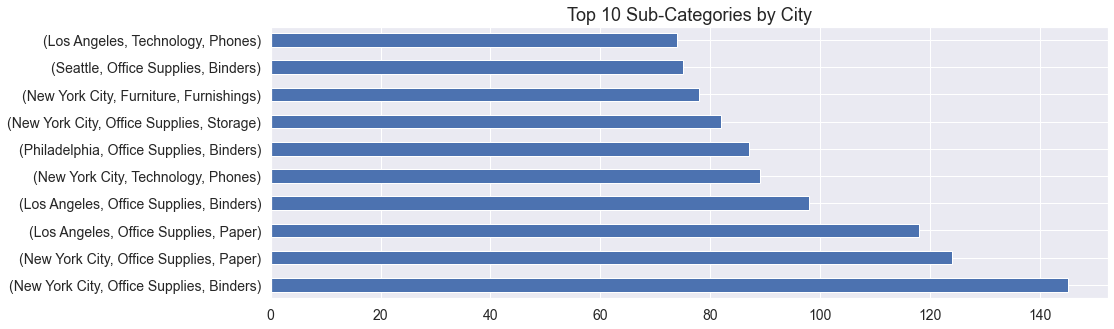

In [54]:
df.groupby(['City','Category'])['Sub-Category'].value_counts().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Top 10 Sub-Categories by City', fontsize=font_size1)
plt.ylabel('');
df.groupby(['City','Category'])['Sub-Category'].value_counts().nlargest(10)

#### Highest Quantity Cities

City
New York City    3417
Los Angeles      2879
Philadelphia     1981
San Francisco    1935
Seattle          1590
Houston          1466
Chicago          1132
Columbus          836
San Diego         670
Springfield       649
Name: Quantity, dtype: int64

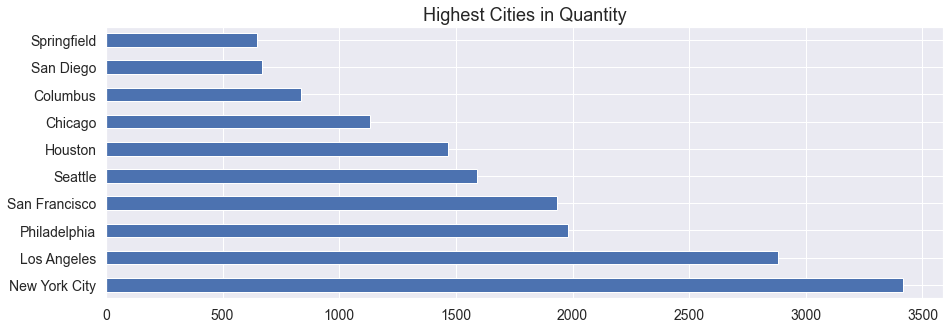

In [55]:
df.groupby('City')['Quantity'].sum().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Cities in Quantity', fontsize=font_size1)
plt.ylabel('');
df.groupby('City')['Quantity'].sum().nlargest(10)

#### Highest  Cities by Total Sales

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64

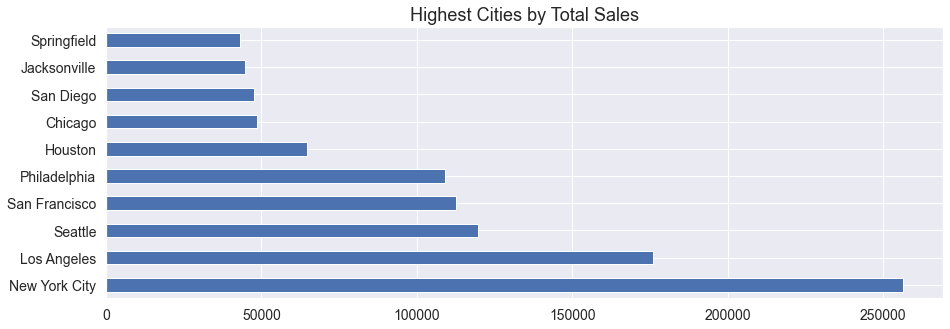

In [56]:
df.groupby('City')['Sales'].sum().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Cities by Total Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby('City')['Sales'].sum().nlargest(10)

#### Highest Cities by Average Sales

City
Jamestown       2354.395000
Cheyenne        1603.136000
Bellingham      1263.413333
Independence    1208.685000
Burbank         1082.386000
Buffalo          906.349600
Burlington       866.723280
Beverly          861.063333
Sparks           853.986667
Appleton         835.655000
Name: Sales, dtype: float64

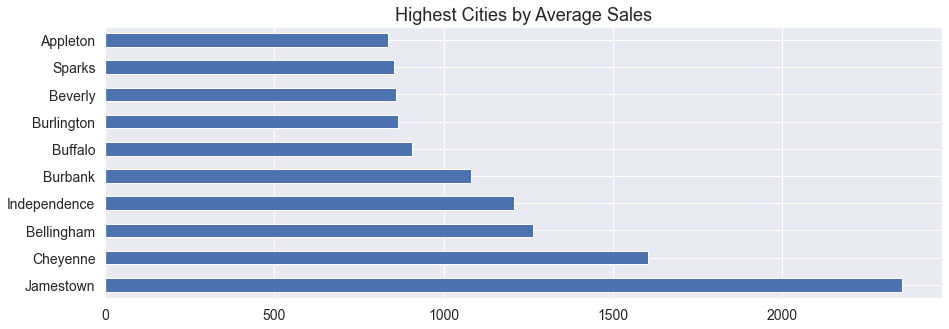

In [57]:
df.groupby('City')['Sales'].mean().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Cities by Average Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby('City')['Sales'].mean().nlargest(10)

### Sales Analysis

#### Highest Categories by Total Sales

Category         Sub-Category
Furniture        Bookcases       114879.9963
                 Chairs          328449.1030
                 Furnishings      91705.1640
                 Tables          206965.5320
Office Supplies  Appliances      107532.1610
                 Art              27118.7920
                 Binders         203412.7330
                 Envelopes        16476.4020
                 Fasteners         3024.2800
                 Labels           12486.3120
                 Paper            78479.2060
                 Storage         223843.6080
                 Supplies         46673.5380
Technology       Accessories     167380.3180
                 Copiers         149528.0300
                 Machines        189238.6310
                 Phones          330007.0540
Name: Sales, dtype: float64

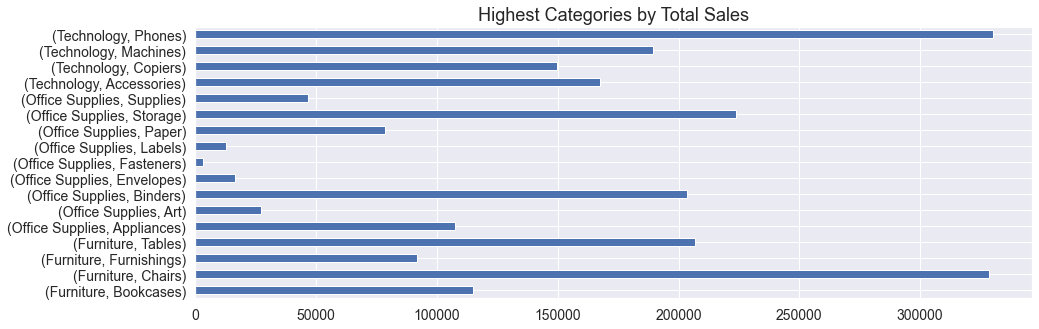

In [58]:
df.groupby(['Category', 'Sub-Category'])['Sales'].sum().plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Categories by Total Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['Category', 'Sub-Category'])['Sales'].sum()

#### Highest Categories by Average Sales

Category         Sub-Category
Furniture        Bookcases        503.859633
                 Chairs           532.332420
                 Furnishings       95.825668
                 Tables           648.794771
Office Supplies  Appliances       230.755710
                 Art               34.068834
                 Binders          133.560560
                 Envelopes         64.867724
                 Fasteners         13.936774
                 Labels            34.303055
                 Paper             57.284092
                 Storage          264.590553
                 Supplies         245.650200
Technology       Accessories      215.974604
                 Copiers         2198.941618
                 Machines        1645.553313
                 Phones           371.211534
Name: Sales, dtype: float64

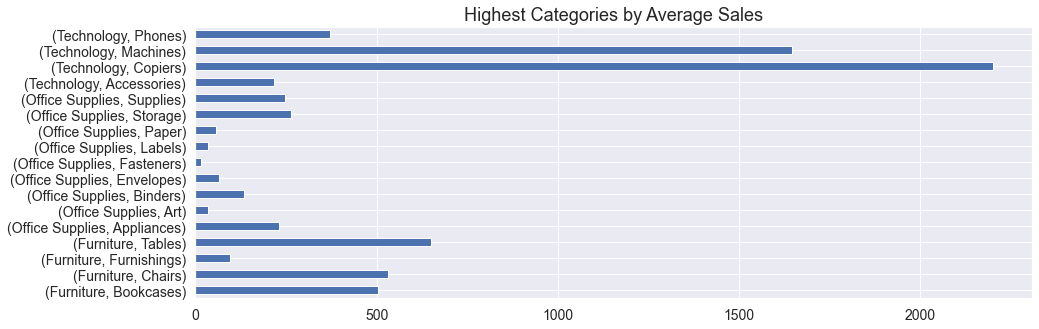

In [59]:
df.groupby(['Category', 'Sub-Category'])['Sales'].mean().plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Categories by Average Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['Category', 'Sub-Category'])['Sales'].mean()

#### Highest States by Total Sales

City           State       
New York City  New York        256368.1610
Los Angeles    California      175851.3410
Seattle        Washington      119540.7420
San Francisco  California      112669.0920
Philadelphia   Pennsylvania    109077.0130
Houston        Texas            64504.7604
Chicago        Illinois         48539.5410
San Diego      California       47521.0290
Detroit        Michigan         42446.9440
Jacksonville   Florida          39133.3280
Name: Sales, dtype: float64

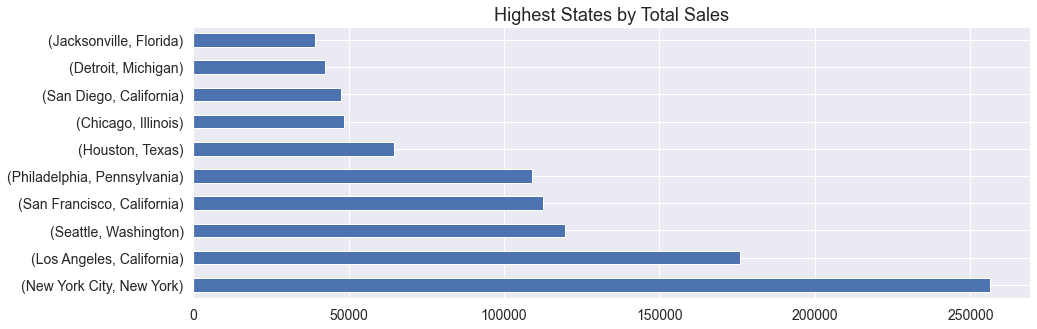

In [60]:
df.groupby(['City', 'State'])['Sales'].sum().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest States by Total Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['City', 'State'])['Sales'].sum().nlargest(10)

#### Highest States by Average Sales

City          State         
Jamestown     New York          2354.395000
Lafayette     Indiana           1635.870833
Cheyenne      Wyoming           1603.136000
Bellingham    Washington        1263.413333
Independence  Missouri          1208.685000
Burlington    North Carolina    1152.843818
Burbank       California        1082.386000
Buffalo       New York           906.349600
Beverly       Massachusetts      861.063333
Sparks        Nevada             853.986667
Name: Sales, dtype: float64

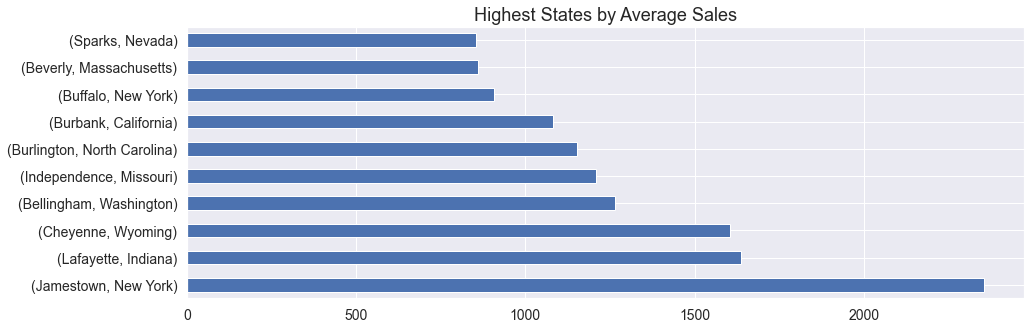

In [61]:
df.groupby(['City', 'State'])['Sales'].mean().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest States by Average Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['City', 'State'])['Sales'].mean().nlargest(10)

#### Highest Quantity by Total Sales

City         State       
Aberdeen     South Dakota      25.500
Abilene      Texas              1.392
Akron        Ohio            2729.986
Albuquerque  New Mexico      2220.160
Alexandria   Virginia        5519.570
                               ...   
Woonsocket   Rhode Island     195.550
Yonkers      New York        7657.666
York         Pennsylvania     817.978
Yucaipa      California        50.800
Yuma         Arizona          840.865
Name: Sales, Length: 604, dtype: float64

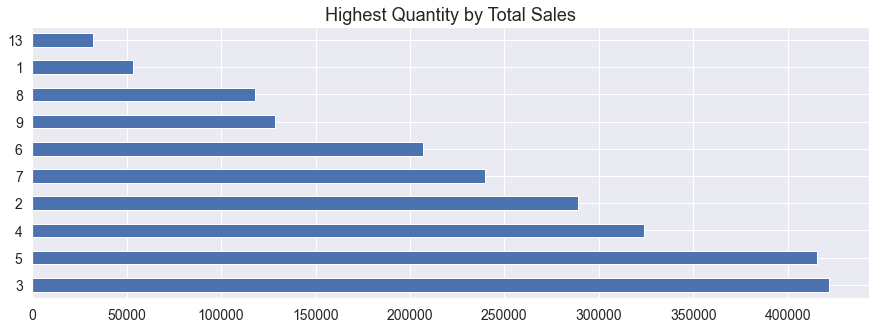

In [62]:
df.groupby(['Quantity'])['Sales'].sum().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Quantity by Total Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['City', 'State'])['Sales'].sum()

#### Highest Quantity by Average Sales

City         State       
Aberdeen     South Dakota     25.500000
Abilene      Texas             1.392000
Akron        Ohio            129.999333
Albuquerque  New Mexico      158.582857
Alexandria   Virginia        344.973125
                                ...    
Woonsocket   Rhode Island     48.887500
Yonkers      New York        510.511067
York         Pennsylvania    163.595600
Yucaipa      California       50.800000
Yuma         Arizona         210.216250
Name: Sales, Length: 604, dtype: float64

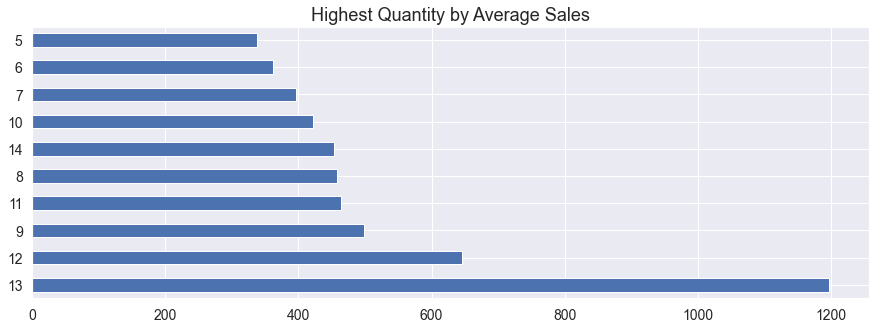

In [63]:
df.groupby('Quantity')['Sales'].mean().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Quantity by Average Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['City', 'State'])['Sales'].mean()

City         State       
Aberdeen     South Dakota     25.500000
Abilene      Texas             1.392000
Akron        Ohio            129.999333
Albuquerque  New Mexico      158.582857
Alexandria   Virginia        344.973125
                                ...    
Woonsocket   Rhode Island     48.887500
Yonkers      New York        510.511067
York         Pennsylvania    163.595600
Yucaipa      California       50.800000
Yuma         Arizona         210.216250
Name: Sales, Length: 604, dtype: float64

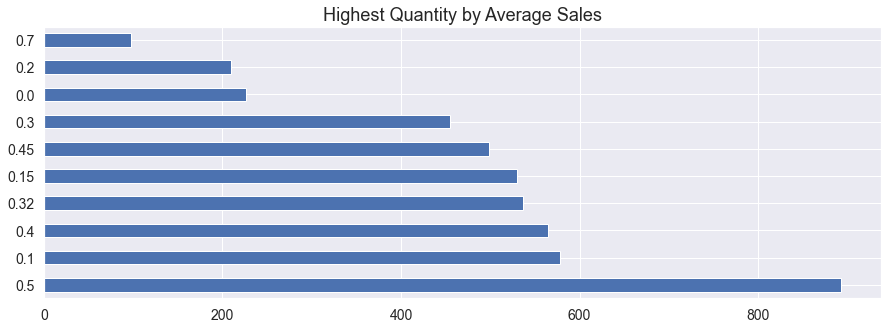

In [64]:
df.groupby('Discount')['Sales'].mean().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Quantity by Average Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['City', 'State'])['Sales'].mean()

City         State       
Aberdeen     South Dakota      25.500
Abilene      Texas              1.392
Akron        Ohio            2729.986
Albuquerque  New Mexico      2220.160
Alexandria   Virginia        5519.570
                               ...   
Woonsocket   Rhode Island     195.550
Yonkers      New York        7657.666
York         Pennsylvania     817.978
Yucaipa      California        50.800
Yuma         Arizona          840.865
Name: Sales, Length: 604, dtype: float64

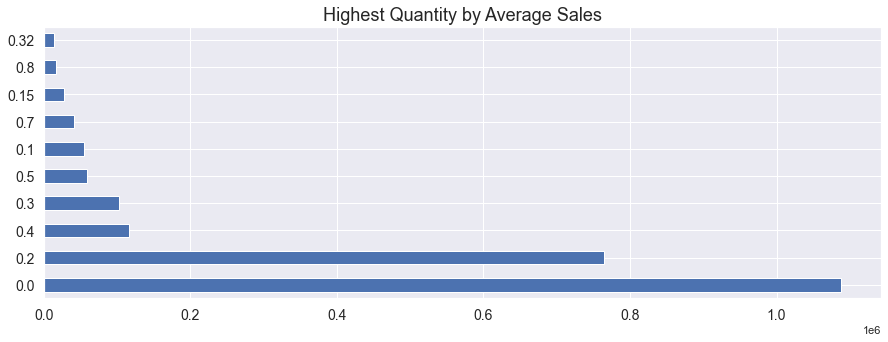

In [65]:
df.groupby('Discount')['Sales'].sum().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Quantity by Average Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['City', 'State'])['Sales'].sum()

In [66]:
# Sales VS Profit & Discount
# Sales VS Ship Mode

### Profit Analysis

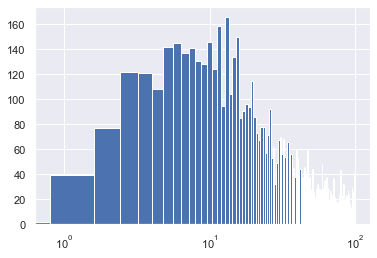

In [67]:
bins = np.arange(-100,100+0.5,0.8)
plt.hist(data = df, x='Sales', bins=bins);
plt.xscale('log')

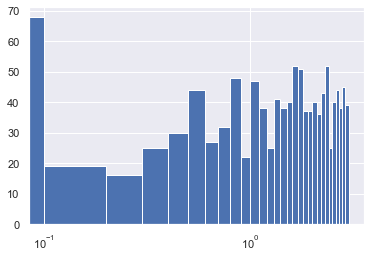

In [68]:
bins = np.arange(-100,3+0.1,0.1)
plt.hist(data = df, x='Profit', bins=bins);
plt.xscale('log')

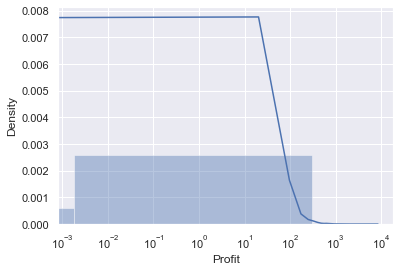

In [69]:
sb.distplot(df['Profit']);
plt.xscale('log')

In [70]:
(df['Profit'].value_counts() > 0).sum(), (df['Profit'].value_counts() < 1).sum()

(7287, 0)

#### Highest Quantity by Total Sales

City         State       
Aberdeen     South Dakota      25.500
Abilene      Texas              1.392
Akron        Ohio            2729.986
Albuquerque  New Mexico      2220.160
Alexandria   Virginia        5519.570
                               ...   
Woonsocket   Rhode Island     195.550
Yonkers      New York        7657.666
York         Pennsylvania     817.978
Yucaipa      California        50.800
Yuma         Arizona          840.865
Name: Sales, Length: 604, dtype: float64

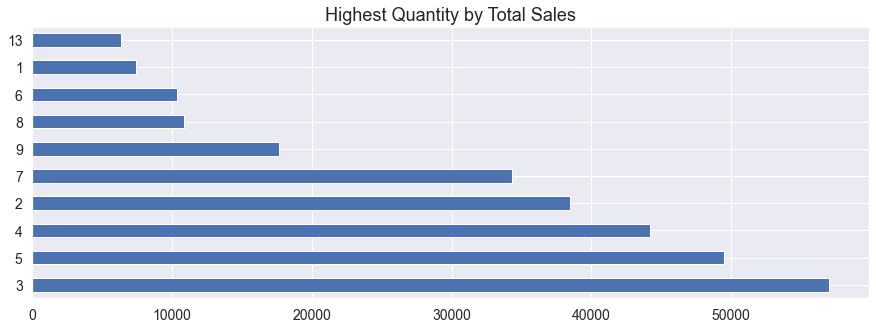

In [71]:
df.groupby(['Quantity'])['Profit'].sum().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Quantity by Total Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['City', 'State'])['Sales'].sum()

#### Highest Quantity by Total Sales

City         State       
Aberdeen     South Dakota     25.500000
Abilene      Texas             1.392000
Akron        Ohio            129.999333
Albuquerque  New Mexico      158.582857
Alexandria   Virginia        344.973125
                                ...    
Woonsocket   Rhode Island     48.887500
Yonkers      New York        510.511067
York         Pennsylvania    163.595600
Yucaipa      California       50.800000
Yuma         Arizona         210.216250
Name: Sales, Length: 604, dtype: float64

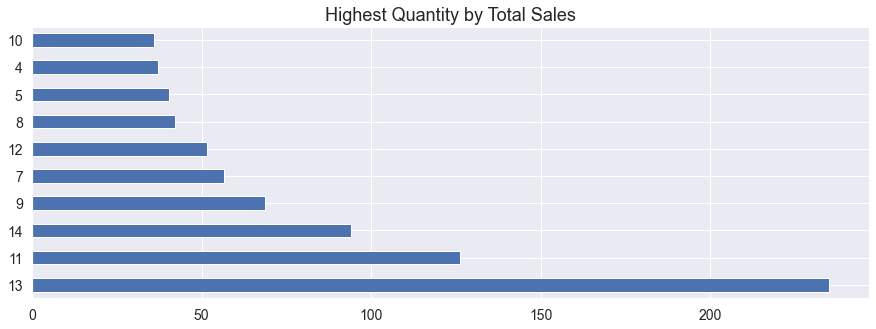

In [72]:
df.groupby(['Quantity'])['Profit'].mean().nlargest(10).plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Quantity by Total Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['City', 'State'])['Sales'].mean()

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

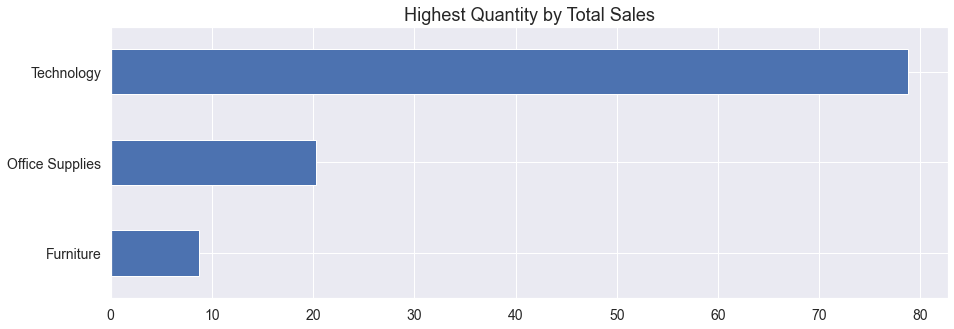

In [73]:
df.groupby(['Category'])['Profit'].mean().plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Quantity by Total Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['Category'])['Profit'].mean()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

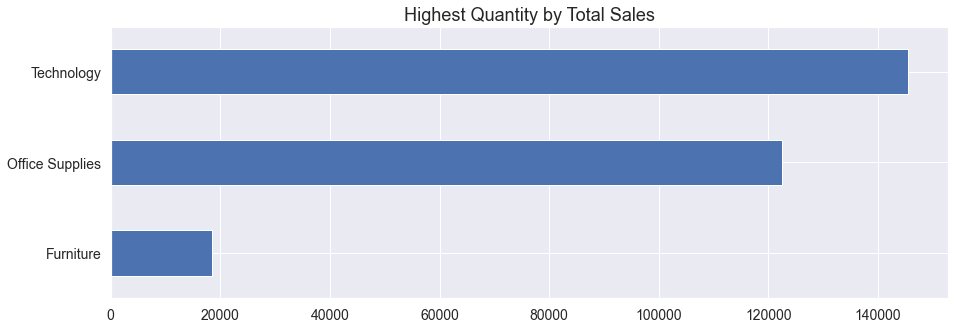

In [74]:
df.groupby(['Category'])['Profit'].sum().plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Quantity by Total Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['Category'])['Profit'].sum()

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

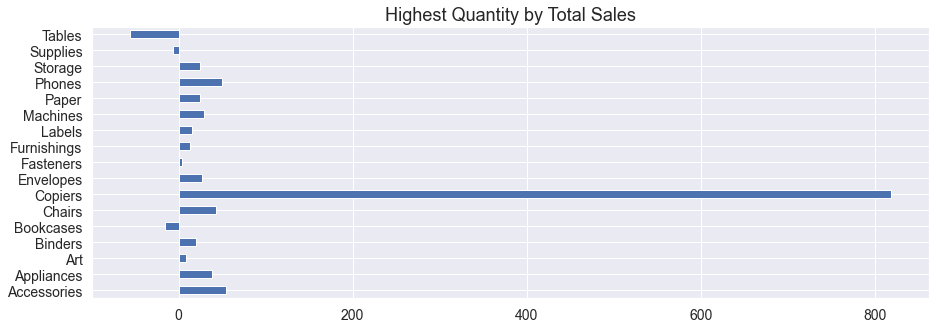

In [75]:
df.groupby(['Sub-Category'])['Profit'].mean().plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Quantity by Total Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['Category'])['Profit'].mean()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

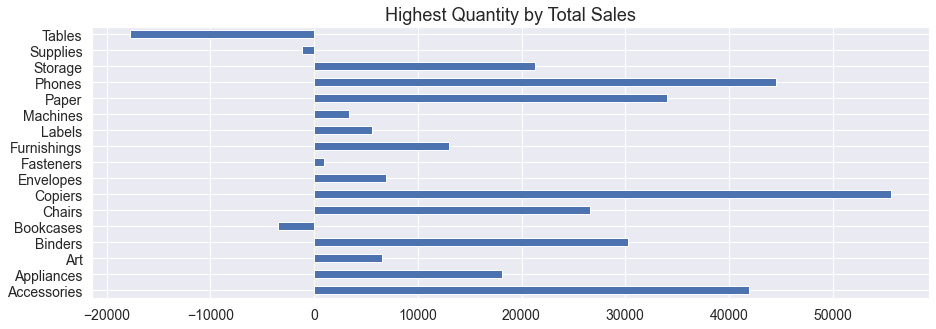

In [76]:
df.groupby(['Sub-Category'])['Profit'].sum().plot(kind='barh', figsize=(15,5), fontsize=font_size2);
plt.title('Highest Quantity by Total Sales', fontsize=font_size1)
plt.ylabel('');
df.groupby(['Category'])['Profit'].sum()

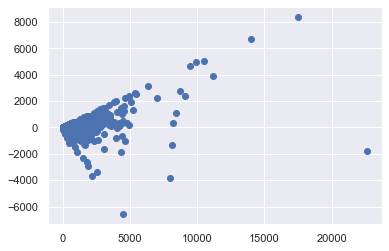

In [77]:
plt.scatter(data = df, x ='Sales', y ='Profit');

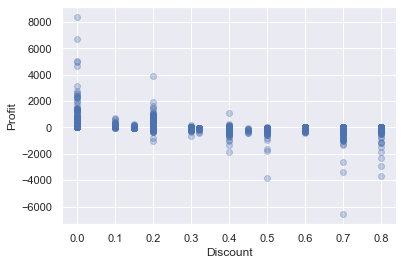

In [78]:
sb.regplot(data = df, x ='Discount', y ='Profit', x_jitter = 0.0, scatter_kws = {'alpha':3/10}, fit_reg = False);

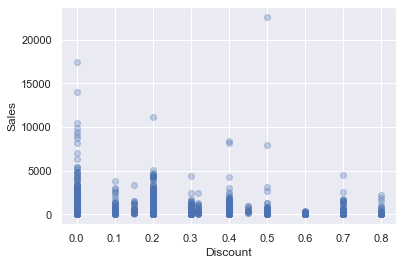

In [79]:
sb.regplot(data = df, x ='Discount', y ='Sales', x_jitter = 0.0, scatter_kws = {'alpha':3/10}, fit_reg = False);

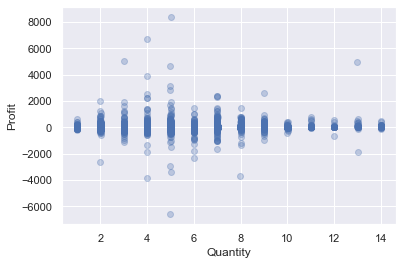

In [80]:
sb.regplot(data = df, x ='Quantity', y ='Profit', x_jitter = 0.01, scatter_kws = {'alpha':3/10}, fit_reg = False);

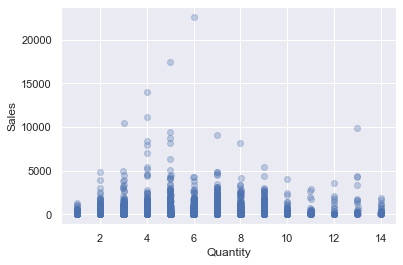

In [81]:
sb.regplot(data = df, x ='Quantity', y ='Sales', x_jitter = 0.01, scatter_kws = {'alpha':3/10}, fit_reg = False);

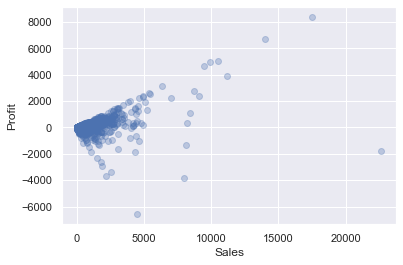

In [82]:
sb.regplot(data = df, x ='Sales', y ='Profit', x_jitter = 0.04, scatter_kws = {'alpha':3/10}, fit_reg = False);

In [83]:
df[['Sales','Profit']].describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


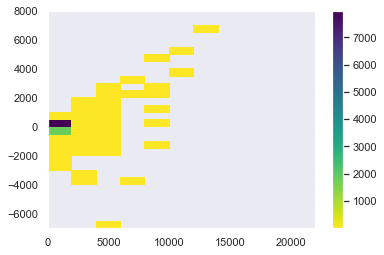

In [84]:
bins_x = np.arange(0,df['Sales'].max()+5,2000)
bins_y = np.arange(-7000,df['Profit'].max()+5,500)
plt.hist2d(data = df, x ='Sales', y ='Profit', cmin = 0.5, cmap = 'viridis_r', bins=[bins_x,bins_y]);
plt.colorbar();

In [85]:
# sb.heatmap(data = df, x ='Category', y ='Profit');

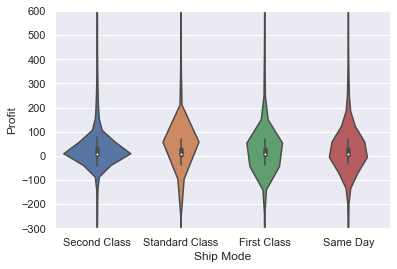

In [86]:
sb.violinplot(data = df, x ='Ship Mode', y ='Profit', size = 6, aspect =2.5);
plt.ylim(-300, 600);

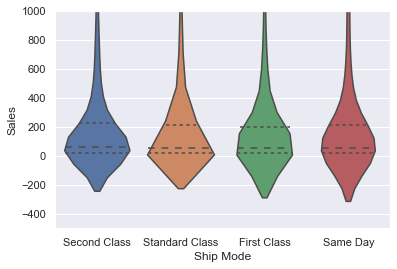

In [87]:
sb.violinplot(data = df, x ='Ship Mode', y ='Sales', inner='quartile');
plt.ylim(-500, 1000);

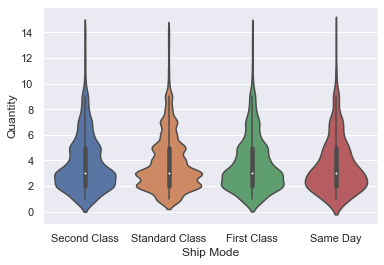

In [88]:
sb.violinplot(data = df, x ='Ship Mode', y ='Quantity');

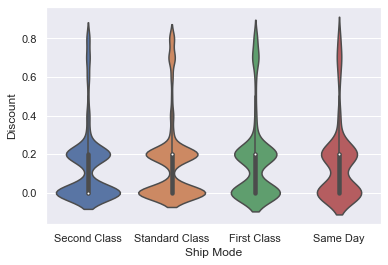

In [89]:
sb.violinplot(data = df, x ='Ship Mode', y ='Discount');

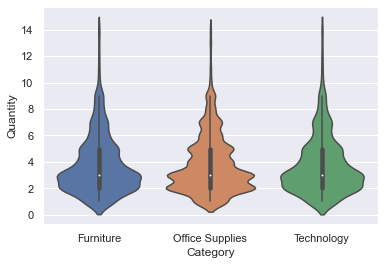

In [90]:
sb.violinplot(data = df, x ='Category', y ='Quantity');

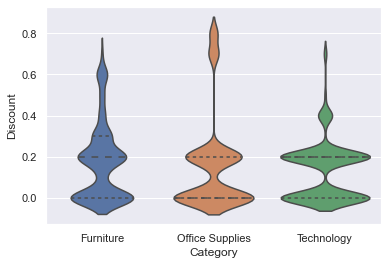

In [91]:
sb.violinplot(data = df, x ='Category', y ='Discount', inner='quartile');

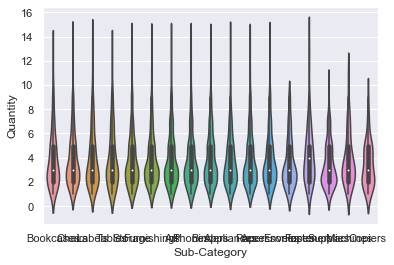

In [92]:
sb.violinplot(data = df, x ='Sub-Category', y ='Quantity');

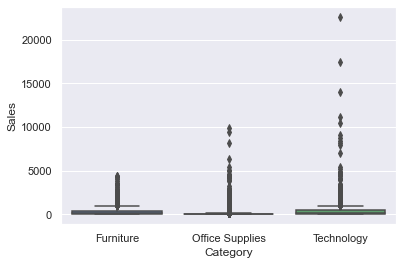

In [93]:
sb.boxplot(data = df, x ='Category', y ='Sales');

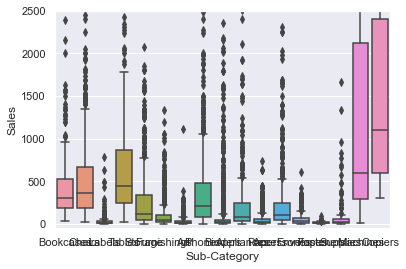

In [94]:
sb.boxplot(data = df, x ='Sub-Category', y ='Sales');
plt.ylim(-50, 2500);

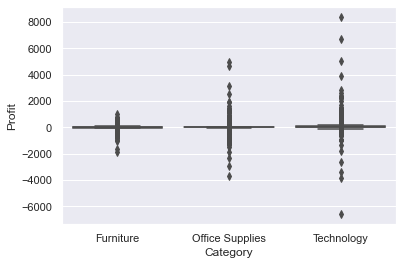

In [95]:
sb.boxplot(data = df, x ='Category', y ='Profit');

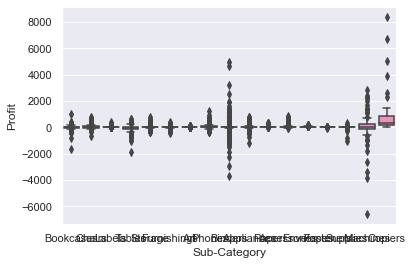

In [96]:
sb.boxplot(data = df, x ='Sub-Category', y ='Profit');

In [97]:
# sb.heatmap(data = df, x ='Quantity', y ='Profit');

In [98]:
# sb.countplot(data = df, x ='Category', hue ='Profit')

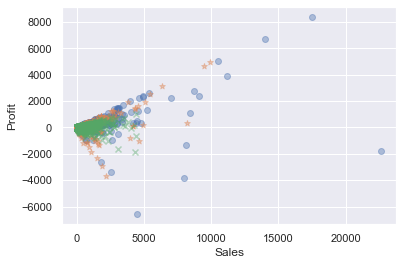

In [99]:
Categories_Markers = [['Technology','o'], ['Office Supplies','*'], ['Furniture','x']]

for Category, Marker in Categories_Markers:
    plotdata = df[df['Category']==Category]
    sb.regplot(data = plotdata, x ='Sales', y ='Profit', x_jitter = 0.04, scatter_kws = {'alpha':4/10}, fit_reg = False, marker=Marker);

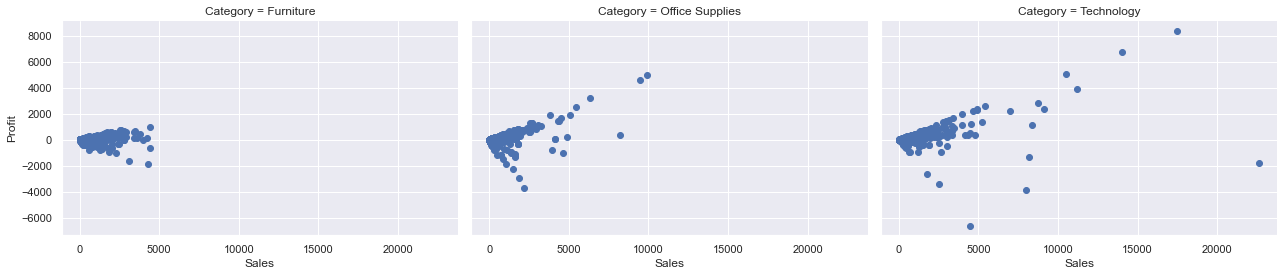

In [111]:
q = sb.FacetGrid(data = df, col='Category', size = 4, aspect =1.5, col_wrap = 3);
q.map(plt.scatter,'Sales','Profit');

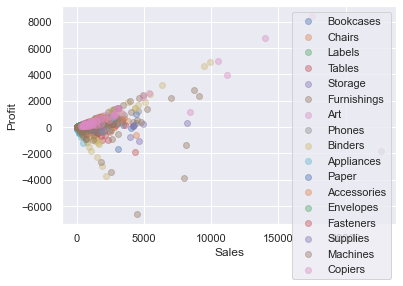

In [101]:
Sub_Categories = df['Sub-Category'].unique()

for i, Sub_Category in enumerate(Sub_Categories):
    plotdata = df[df['Sub-Category']==Sub_Categories[i]]
    sb.regplot(data = plotdata, x ='Sales', y ='Profit', x_jitter = 0.04, scatter_kws = {'alpha':4/10}, fit_reg = False);
plt.legend(Sub_Categories);

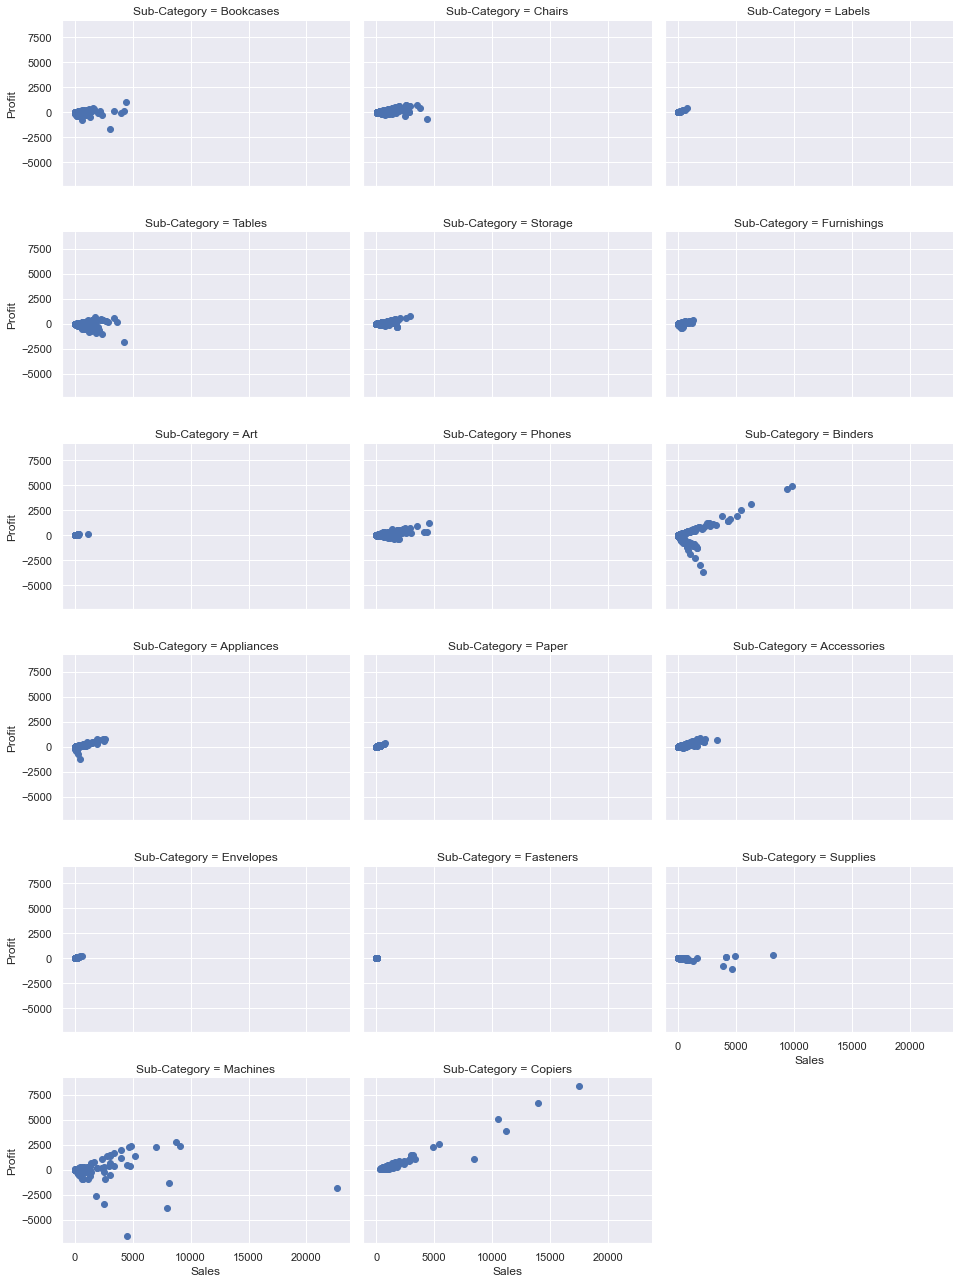

In [102]:
q = sb.FacetGrid(data = df, col='Sub-Category', size = 3, aspect =1.5, col_wrap = 3);
q.map(plt.scatter,'Sales','Profit');

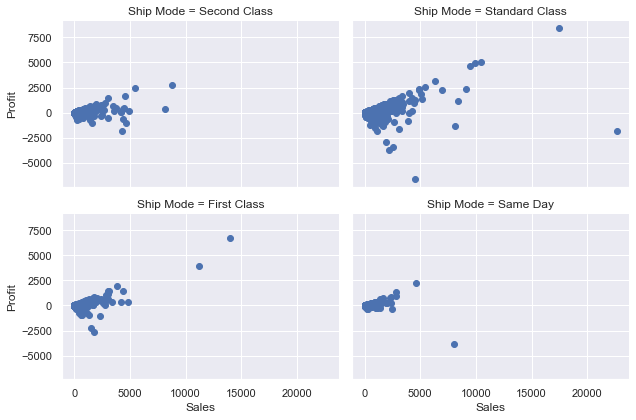

In [103]:
q = sb.FacetGrid(data = df, col='Ship Mode', size = 3, aspect =1.5, col_wrap = 2);
q.map(plt.scatter,'Sales','Profit');

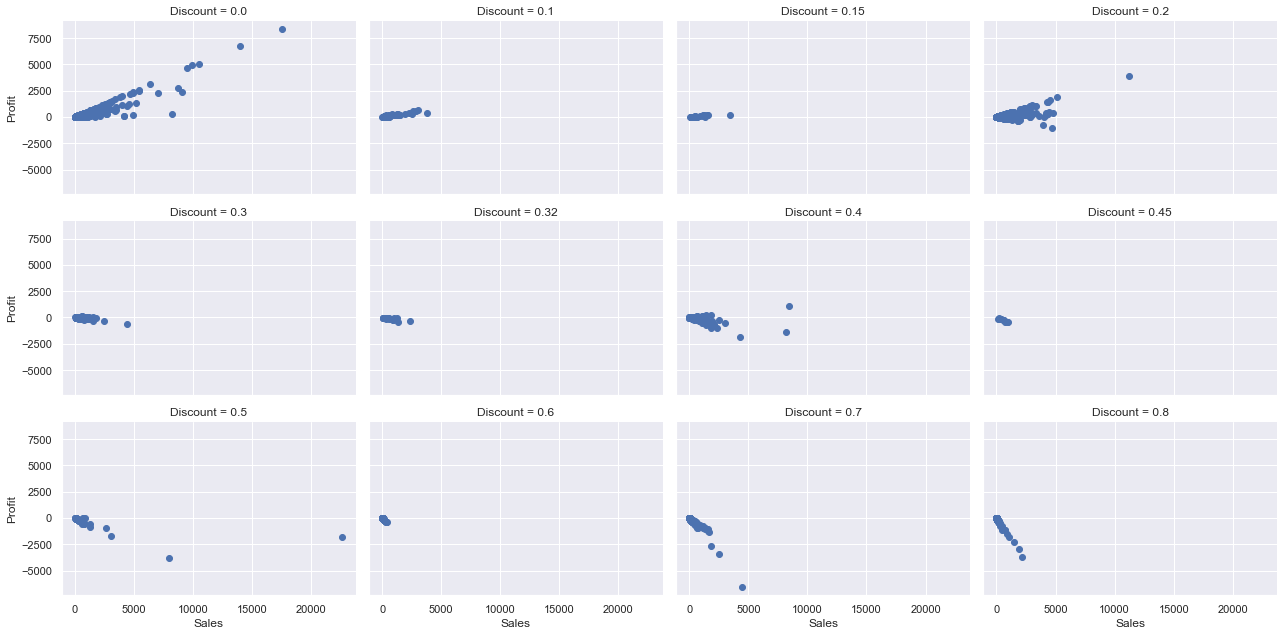

In [104]:
q = sb.FacetGrid(data = df, col='Discount', size = 3, aspect =1.5, col_wrap = 4);
q.map(plt.scatter,'Sales','Profit');

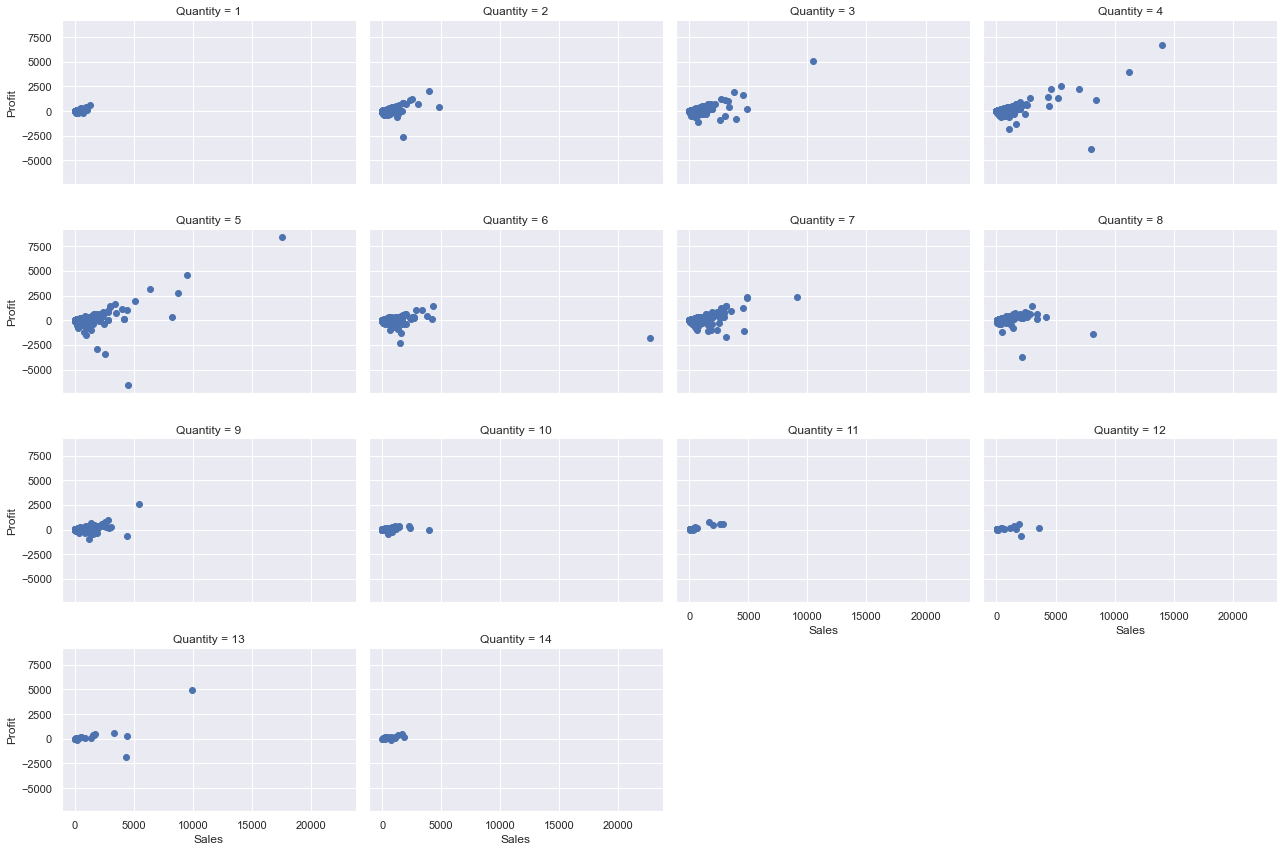

In [105]:
q = sb.FacetGrid(data = df, col='Quantity', size = 3, aspect =1.5, col_wrap = 4);
q.map(plt.scatter,'Sales','Profit');

In [106]:
# q = sb.FacetGrid(data = df, col='City', col_wrap = 4);
# q.map(plt.scatter,'Sales','Profit');

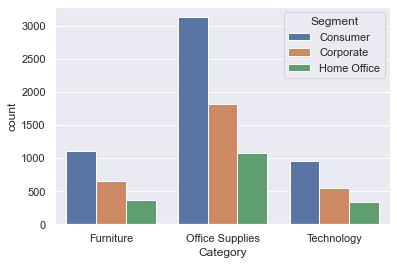

In [107]:
sb.countplot(data = df, x = 'Category', hue = 'Segment');

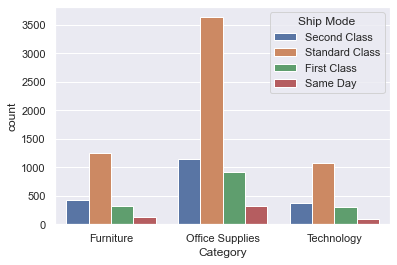

In [108]:
sb.countplot(data = df, x = 'Category', hue = 'Ship Mode');

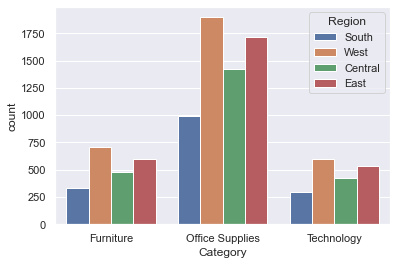

In [109]:
sb.countplot(data = df, x = 'Category', hue = 'Region');

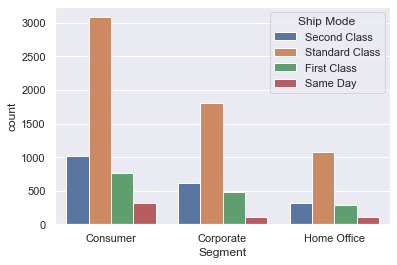

In [110]:
sb.countplot(data = df, x = 'Segment', hue = 'Ship Mode');

In [ ]:
bins = np.arange(-100,200,5)
sb.distplot(df['Profit'], bins=bins);
plt.ylim(0, 0.01);
plt.xlim(-100, 200);

In [ ]:
bins_x = np.arange(0,600+5,10)
bins_y = np.arange(-100,200+5,5)
plt.hist2d(data = df, x ='Sales', y ='Profit', cmin = 0.5, cmap = 'viridis', bins=[bins_x,bins_y]);
plt.colorbar();
plt.xlim(0, 200);
plt.ylim(-100, 200);

In [ ]:
(df['Profit'] >= 0).sum(), (df['Profit'] < 0).sum()

In [ ]:
sb.lineplot(data = df, x ='Sub-Category', y ='Quantity');

In [ ]:
sb.pointplot(data = df, x ='Category', y ='Sales');

In [ ]:
sb.pointplot(data = df, x ='Sub-Category', y ='Sales');
plt.ylim(-50, 2500);

In [ ]:
sb.pointplot(data = df, x ='Category', y ='Profit');

In [ ]:
sb.pointplot(data = df, x ='Sub-Category', y ='Profit');

______________

## Conclusion

### What are weak areas where you can work to make more profit?


### What all business problems you can derive by exploring the data?